# KNN Project

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_pickle("saved_df.pkl")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(707, 9)

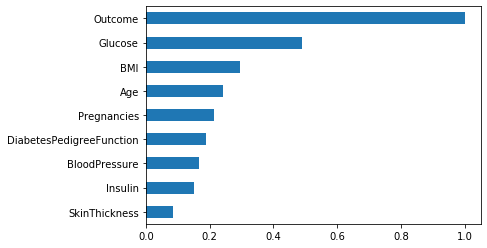

In [6]:
df.corr()["Outcome"].sort_values().plot.barh()

In [19]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [20]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[121,  16],
       [ 34,  42]], dtype=int64)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       137
           1       0.72      0.55      0.63        76

    accuracy                           0.77       213
   macro avg       0.75      0.72      0.73       213
weighted avg       0.76      0.77      0.76       213



In [22]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
536,0,105,90,0,0,29.6,0.197,46
74,1,79,75,30,0,32.0,0.396,22
242,3,139,54,0,0,25.6,0.402,22
630,7,114,64,0,0,27.4,0.732,34
537,0,57,60,0,0,21.7,0.735,67


In [23]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,3.597166,121.255061,73.054656,21.200405,85.892713,32.420648,0.475682,32.971660
std,3.117326,30.173597,12.192134,15.605504,121.364331,6.949658,0.341965,11.779379
min,0.000000,56.000000,40.000000,0.000000,0.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.600000,0.245250,24.000000
50%,3.000000,116.000000,73.000000,23.000000,47.000000,32.150000,0.371000,29.000000
75%,5.750000,140.750000,80.000000,33.000000,130.000000,36.175000,0.625500,40.000000
max,12.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
a=pd.DataFrame(X_train, columns=X.columns)

In [26]:
a.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.155097,-0.539264,1.391268,-1.359898,-0.708444,-0.406280,-0.815770,1.107151
1,-0.833984,-1.401818,0.159719,0.564449,-0.708444,-0.060589,-0.233249,-0.932374
2,-0.191758,0.588691,-1.564449,-1.359898,-0.708444,-0.982431,-0.215686,-0.932374
3,1.092694,-0.240688,-0.743417,-1.359898,-0.708444,-0.723163,0.750304,0.087389
4,-1.155097,-2.131671,-1.071830,-1.359898,-0.708444,-1.544179,0.759086,2.891734


In [27]:
a.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.155097,-0.539264,1.391268,-1.359898,-0.708444,-0.406280,-0.815770,1.107151
1,-0.833984,-1.401818,0.159719,0.564449,-0.708444,-0.060589,-0.233249,-0.932374
2,-0.191758,0.588691,-1.564449,-1.359898,-0.708444,-0.982431,-0.215686,-0.932374
3,1.092694,-0.240688,-0.743417,-1.359898,-0.708444,-0.723163,0.750304,0.087389
4,-1.155097,-2.131671,-1.071830,-1.359898,-0.708444,-1.544179,0.759086,2.891734


## knn model

In [28]:
knn_model=KNeighborsClassifier().fit(X_train, y_train)

In [29]:
y_pred=knn_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[120,  17],
       [ 37,  39]], dtype=int64)

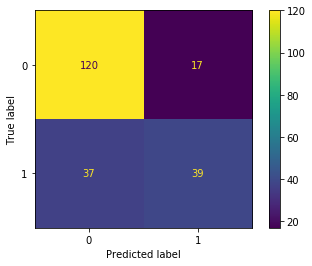

In [32]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model,X_test,y_test)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       137
           1       0.70      0.51      0.59        76

    accuracy                           0.75       213
   macro avg       0.73      0.69      0.70       213
weighted avg       0.74      0.75      0.74       213



## model tunning

In [33]:
knn = KNeighborsClassifier()

In [34]:
np.arange(1,50)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [35]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [36]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)

In [37]:
knn_cv_model.best_params_

{'n_neighbors': 15}

In [40]:
knn_tuned = KNeighborsClassifier(n_neighbors = 13).fit(X_train, y_train)

In [41]:
y_pred = knn_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       137
           1       0.70      0.49      0.57        76

    accuracy                           0.74       213
   macro avg       0.73      0.69      0.69       213
weighted avg       0.74      0.74      0.73       213



## GridSearch with recall

In [43]:
knn_cv_model = GridSearchCV(knn, knn_params, scoring = "recall", cv=10).fit(X_train, y_train)

In [44]:
knn_cv_model.best_params_

{'n_neighbors': 3}

In [51]:
knn_tuned_2 = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
y_pred = knn_tuned_2.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       137
           1       0.70      0.51      0.59        76

    accuracy                           0.75       213
   macro avg       0.73      0.69      0.70       213
weighted avg       0.74      0.75      0.74       213



## model deployment

In [52]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       146
           1       0.68      0.63      0.65        67

    accuracy                           0.79       213
   macro avg       0.76      0.74      0.75       213
weighted avg       0.79      0.79      0.79       213



## saving the model

In [54]:
import pickle
pickle.dump(log_model, open("my_model", 'wb'))

In [55]:
model = pickle.load(open("my_model", "rb"))

**predictions with the saved model**

In [57]:
prediction = model.predict(X)

In [58]:
prediction[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [59]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
df["Pred"]=model.predict(X)

In [66]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pred
290,0,78,88,29,40,36.9,0.434,21,0,0
352,3,61,82,28,0,34.4,0.243,46,0,0
303,5,115,98,0,0,52.9,0.209,28,1,1
763,10,101,76,48,180,32.9,0.171,63,0,0
295,6,151,62,31,120,35.5,0.692,28,0,1
425,4,184,78,39,277,37.0,0.264,31,1,1
648,11,136,84,35,130,28.3,0.260,42,1,1
602,1,124,74,36,0,27.8,0.100,30,0,0
568,4,154,72,29,126,31.3,0.338,37,0,0
149,2,90,70,17,0,27.3,0.085,22,0,0


In [67]:
pred_prob = model.predict_proba(X)

In [70]:
pred_prob[:5][:,1]

array([0.72296584, 0.09077122, 0.77284842, 0.06980525, 0.97526357])

In [71]:
df["Prob"]=pred_prob[:,1]

In [74]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pred,Prob
486,1,139,62,41,480,40.7,0.536,21,0,0,0.445544
106,1,96,122,0,0,22.4,0.207,27,0,0,0.014997
165,6,104,74,18,156,29.9,0.722,41,1,0,0.336246
230,4,142,86,0,0,44.0,0.645,22,1,1,0.696705
341,1,95,74,21,73,25.9,0.673,36,0,0,0.117155
335,0,165,76,43,255,47.9,0.259,26,0,1,0.612750
327,10,179,70,0,0,35.1,0.200,37,0,1,0.826685
321,3,112,74,30,0,31.6,0.197,25,1,0,0.215894
293,1,128,48,45,194,40.5,0.613,24,1,1,0.630166
386,5,116,74,29,0,32.3,0.660,35,1,0,0.487949


**prediction for a single patient**

In [76]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [77]:
my_dict={'Pregnancies':10, 
        'Glucose':180, 
        'BloodPressure':70,
        'SkinThickness':30,
        'Insulin':50,
        'BMI':38, 
        'DiabetesPedigreeFunction':0.15,
        'Age':50}

In [78]:
df_sample=pd.DataFrame([my_dict])

In [81]:
df_sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,10,180,70,30,50,38,0.15,50


In [82]:
single_pred=model.predict(df_sample)

In [83]:
print(single_pred)

[1]


In [84]:
single_pred_prob=model.predict_proba(df_sample)

In [86]:
print(single_pred_prob[:,1])

[0.8699715]
